# Import Statements

In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# One Hot Encoding the Target Classes

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Creating 3 Important Lists --
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [3]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'../input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

# Splitting the Data into Training & Testing

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [9]:
y_train.shape

(111, 2)

In [10]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 3s 1s/step - loss: 79.3326 - val_loss: 42.5277
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 17.7606 - val_loss: 70.0688
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 9.4687 - val_loss: 14.7581
Epoch 4/30
3/3 [==============================] - 3s 993ms/step - loss: 4.5975 - val_loss: 23.5701
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 3.9477 - val_loss: 16.4190
Epoch 6/30
3/3 [==============================] - 3s 933ms/step - loss: 1.3051 - val_loss: 4.8896
Epoch 7/30
3/3 [==============================] - 3s 932ms/step - loss: 1.0897 - val_loss: 1.0343
Epoch 8/30
3/3 [==============================] - 3s 954ms/step - loss: 0.8229 - val_loss: 0.9565
Epoch 9/30
3/3 [==============================] - 3s 924ms/step - loss: 0.8666 - val_loss: 2.8124
Epoch 10/30
3/3 [==============================] - 3s 956ms/step - loss: 0.6506 - val_loss: 4.4251
Epoch 11/30
3/3 [=======

# Plotting Losses

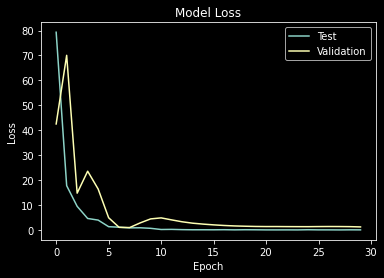

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Just Checking the Model

In [12]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.97681975364685% Confidence This Is No, Its not a tumor


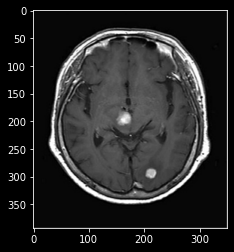

In [13]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

97.33012318611145% Confidence This Is A Its a Tumor


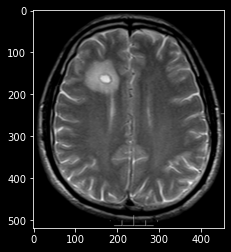

In [14]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

# Thats It !!